# Beispiel lineare DGL 1. Ordnung: R-L Glied

<img src=RLGlied.jpg width=40%>

$$U(t) = U0\cdot \sin(\omega\,t)$$

Der Strom $i(t)$ kann mit der linearen DGL 1. Ordnung

$$L \frac{di}{dt}(t) + R\, i(t) = U(t)$$

beschrieben werden. Wobei angenommen wird, dass die Anfangsbedingung

$$i(0) = 0$$

erfüllt sei. Die allgemeine Lösung, berechnet mit Hilfe der Methode der Variation der Konstanten, lautet in dem Fall 

$$i(t) = \frac{U_0}{R^2+\omega^2 L^2} \big(\underbrace{\omega\, L\, e^{-\tau t}}_{\to 0\ \text{für}\ t\to\infty} + \underbrace{R\, \sin(\omega t) - \omega\, L\, \cos(\omega t)}_{\text{asymptotische Lösung}}\big)\tag{1}$$
wobei $\tau = \frac{R}{L}$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## explizites Euler-Verfahren

Das explizite Euler-Verfahren ist gegeben durch

$$y_{k+1} = y_k + h \cdot f(x_k, y_k).$$

Auf das R-L Glied angewandt folgt für den Strom $i(t_k) = i_k$

$$i_{k+1} = i_k + \Delta t \cdot f(t_k, i_k),$$

wobei

$$f(t, i) = \frac{U(t)}{L} - \frac{R}{L}\, i\quad\text{mit}\quad U(t) = U_0\cdot \sin(\omega t).$$


Parameter für das konkrete numerische Problem:

In [2]:
R = 2.2
L = 0.1
U0 = 1
omega = 2*np.pi*2
i0 = 0

In [3]:
def f(t,i):
    return U0/L*np.sin(omega*t) - R/L*i

In [4]:
def ianalytisch(t):
    return U0/(R**2+omega**2*L**2)*(omega*L*np.exp(-R/L*t)+R*np.sin(omega*t)-omega*L*np.cos(omega*t))

In [5]:
talt = 0
dt = 0.01#0.01#0.1 # dtkrit = 2*L/R = 0.0909..
Tend = 2

i = [i0]
t = [0]
ialt = i0

while talt < Tend:
    # explizites Euler-Verfahren
    ineu = ialt + dt * f(talt, ialt)
    tneu = talt + dt
    
    # speichern des Resultates
    i.append(ineu)
    t.append(tneu)
    
    ialt = ineu
    talt = tneu

In [6]:
tp = np.linspace(0,Tend,400)

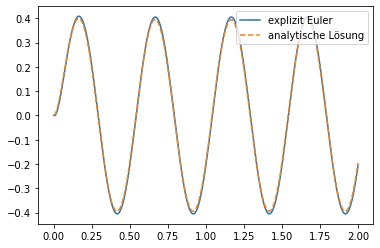

In [7]:
plt.plot(t,i,label='explizit Euler')
plt.plot(tp,ianalytisch(tp),'--',label='analytische Lösung')
plt.legend(loc=1)
plt.show()

## implizites Euler-Verfahren

Das implizite Euler-Verfahren ist gegeben durch

$$y_{k+1} = y_k + h \cdot f(x_{k+1}, y_{k+1}).$$

Auf das R-L Glied angewandt folgt für den Strom $i(t_k) = i_k$

$$i_{k+1} = i_k + \Delta t \cdot f(t_{k+1}, {\color{red} i_{\color{red}k\color{red}+\color{red}1}}).$$

**Bemerkung:** in jedem Zeitschritt muss eine Gleichung gelöst werden, daher wird das Verfahren **implizit** genannt.

Da wir es mit einer linearen Differentialgleichung zu tun haben, können wir diese Gleichung schon vorab lösen. Aus

$${\color{red} i_{\color{red}k\color{red}+\color{red}1}} = i_k + \Delta t\cdot\big( \frac{U(t)}{L} - \frac{R}{L}\, {\color{red} i_{\color{red}k\color{red}+\color{red}1}}\big)$$

folgt

$${\color{red} i_{\color{red}k\color{red}+\color{red}1}} + \Delta t\cdot\frac{R}{L}\, {\color{red} i_{\color{red}k\color{red}+\color{red}1}} = i_k + \Delta t\cdot
\frac{U(t)}{L}$$

und damit

$$\begin{split}i_{k+1} & = \left(1+\Delta t\cdot\frac{R}{L}\right)^{-1}\cdot\left(i_k + \Delta t\cdot
\frac{U(t)}{L}\right)\\
& = \frac{L}{L+\Delta t R} i_k + \frac{\Delta t}{L+\Delta t R} U_0 \sin(\omega t).
\end{split}$$

**Bemerkung:** Dieser Ansatz ist für die Numerik nicht sonderlich interessant, da das Problem in die Rechnung eingeht. Im Praktikum werden wir uns daher Gedanken machen, wie wir diese Rechnung vermeiden können.

In [8]:
talt = 0
#dt = 0.1 # dt uebernehmen wir von exlizitem Euler-Verfahren
# Tend = 2

i2 = [i0]
t2 = [0]
ialt = i0

while talt < Tend:
    # inplizites Euler-Verfahren
    ineu = L/(L+dt*R)*ialt + U0*dt/(L+dt*R)*np.sin(omega*(talt+dt))
    tneu = talt + dt
    
    # speichern des Resultates
    i2.append(ineu)
    t2.append(tneu)
    
    ialt = ineu
    talt = tneu

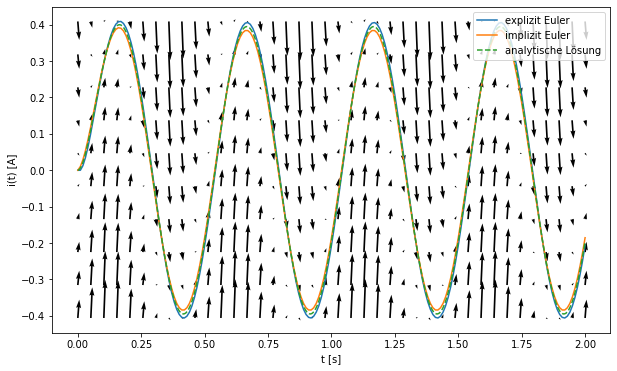

In [9]:
plt.figure(figsize=(10,6))
plt.plot(t,i,label='explizit Euler')
plt.plot(t2,i2,label='implizit Euler')
plt.plot(tp,ianalytisch(tp),'--',label='analytische Lösung')
tq,iq = np.meshgrid(np.linspace(0,2,int(2/.05)),np.linspace(np.min(i),np.max(i),10))
plt.quiver(tq,iq,np.ones_like(tq),f(tq,iq),angles='xy')
plt.legend(loc=1)
plt.xlabel('t [s]')
plt.ylabel('i(t) [A]')
plt.show()